In [1]:
# Import thư viện 
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('sales_data_sample.csv')
df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE
0,10107,30,2,2871.00,2/24/2003 0:00,Shipped,USA,Small
1,10121,34,5,2765.90,5/7/2003 0:00,Shipped,France,Small
2,10134,41,2,3884.34,7/1/2003 0:00,Shipped,France,Medium
3,10145,45,6,3746.70,8/25/2003 0:00,Shipped,USA,Medium
4,10159,49,14,5205.27,10/10/2003 0:00,Shipped,USA,Medium


In [3]:
# Xem dữ liệu 
df.shape

(2823, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   COUNTRY          2823 non-null   object 
 7   DEALSIZE         2823 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 176.6+ KB


# Câu 2

In [5]:
# Max Absolute cho SALES có giá trị index = 100 
# xem giá trị của SALES ở dòng 100
df.loc[100 , 'SALES']

2990.13

In [6]:
# Lấy giá trị max của cột sales
df['SALES'].max()

14082.8

In [7]:
# Hàm max Absolute cho SALES
#Áp dụng Max Absolute Scaling
# Công thức lấy giá trị có index = 100 chia cho max
maxsales = df['SALES'].max()
max100 = df.loc[100 , 'SALES']

MaxAbsolute = max100 / maxsales 

MaxAbsolute

0.21232496378561083

# Câu 3
Mức độ nhọn của các giá trị đặt hàng của các sản phẩm

In [8]:
import numpy as np
from scipy.stats import skew

In [9]:
from scipy.stats import kurtosis

kurt = kurtosis(df['QUANTITYORDERED'])
print(f'Giá trị kurtosis: {kurt}')

Giá trị kurtosis: 0.4128831579388397


Giá trị kurtosis: 0.4128831579388397 B do <3 thì ra platykurtic =3 là  mesokurtic còn >3 là leptokurtic


# Câu 5

In [1]:
# Import thư viện 
import numpy as np
import matplotlib.pyplot as plt

# Vẽ biểu đồ tương quan tuyến tính
plt.scatter(df['QUANTITYORDERED'], df['SALES'], color='r')
plt.xlabel('Đơn giá')
plt.ylabel('Giá trị đặt hàng')
plt.title('Biểu đồ Tương Quan Tuyến Tính')
# Hiển thị biểu đồ
plt.show()


NameError: name 'df' is not defined

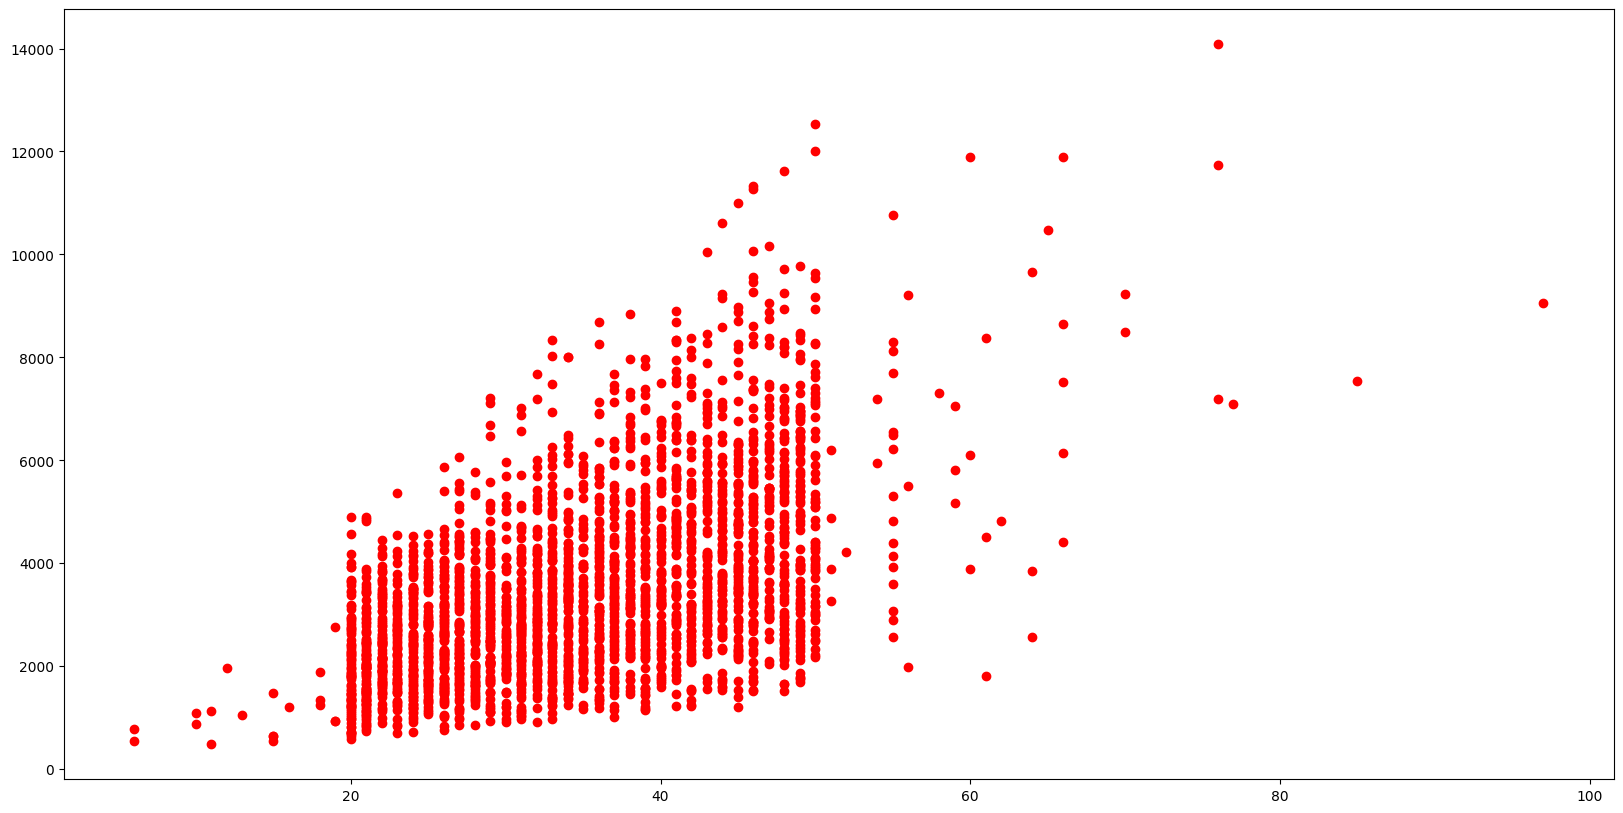

In [12]:
plt.figure(figsize=(20, 10)) 
plt.plot( df[['QUANTITYORDERED']], df[['SALES']][0:], 'ro')
plt.show()

# Câu 6 
Giá trị lệch của SALES khi được transform qua hàm f(x) = 1 / (log(x)^2 +1) rồi tiếp tục đi qua hàm f(x) = sqrt (x)

# Câu 7



In [13]:
# Xem dữ liệu cột SALES
df['SALES']

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
         ...   
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: SALES, Length: 2823, dtype: float64

In [14]:
df['sales_transform1'] = 1 / (np.log(df['SALES'])**2 + 1)
h=df['sales_transform1']
n=skew(h)
print('độ lệch câu 7 ',n)
df['sales_transform2'] = np.sqrt(df['sales_transform1'])
p=df['sales_transform2']
t = skew(p)
print('độ lệch câu 6 ',t)



độ lệch câu 7  0.7675895261439601
độ lệch câu 6  0.5659624607534838


In [15]:
# Xóa cột 'sales_transform1' và 'sales_transform2' khỏi DataFrame
df = df.drop(['sales_transform1', 'sales_transform2'], axis=1)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   COUNTRY          2823 non-null   object 
 7   DEALSIZE         2823 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 176.6+ KB


# Câu 8 
Hãy cho biết trong đơn hàng số dòng đặt hàng nhiều nhất là bao nhiêu ?

In [17]:
quantity_order_counts = df.groupby('ORDERLINENUMBER')['QUANTITYORDERED'].value_counts()

print("Số dòng đặt hàng nhiều nhất là:",quantity_order_counts)

Số dòng đặt hàng nhiều nhất là: ORDERLINENUMBER  QUANTITYORDERED
1                43                 15
                 32                 14
                 34                 14
                 24                 13
                 26                 13
                                    ..
18               31                  1
                 36                  1
                 40                  1
                 42                  1
                 48                  1
Name: count, Length: 563, dtype: int64


# Câu 9
hãy sắp sếp mức độ giảm dần độ lệch của SALES sau khi được tranforms qua log,sqrt, square và cube root?

In [18]:
sales_log = np.log(df['SALES']).skew()

sales_sqrt = np.sqrt(df['SALES']).skew()

sales_square = np.square(df['SALES']).skew()

sales_cube = np.cbrt(df['SALES']).skew()

print('sales_log : ', sales_log)
print('sales_sqrt : ', sales_sqrt)
print('sales_square : ', sales_square)
print('sales_cube : ', sales_cube)

sales_log :  -0.2021742362869817
sales_sqrt :  0.47281500087876144
sales_square :  2.915766495908139
sales_cube :  0.25086487312083416


# Câu 10
H0: độc lập <br>
Pvalue < 0 chấp nhận H0 => không phụ thuộc <br>
Pvalue > 0 bác bỏ H0 => có phụ thuộc

In [19]:
# Só lượng giao hàng và trạng thái giao hàng trên từng nhóm kích thước

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols ('QUANTITYORDERED ~ STATUS + DEALSIZE + STATUS:DEALSIZE', data=df).fit()
result = sm.stats.anova_lm(model, type = 2)

print(result)

                     df         sum_sq       mean_sq           F  \
STATUS              5.0    3562.031394    712.406279    9.934607   
DEALSIZE            2.0   59596.757162  29798.378581  415.542636   
STATUS:DEALSIZE    10.0    4970.214184    497.021418    6.931035   
Residual         2806.0  201217.018730     71.709558         NaN   

                        PR(>F)  
STATUS            1.959223e-09  
DEALSIZE         8.508626e-159  
STATUS:DEALSIZE   8.382818e-11  
Residual                   NaN  


Pvalue < 0 nhận H0 => không phụ thuộc

# Câu 11
Có mối liên hệ giữa trạng thái giao hàng và kích thước không

In [20]:
# Import thư viện
import pandas as pd
from scipy.stats import chi2_contingency

# Tạo bảng tần số chéo (contingency table)
contingency_table = pd.crosstab(df['STATUS'], df['DEALSIZE'])

# Thực hiện kiểm định chi-squared
chi2, p, _, _ = chi2_contingency(contingency_table)

# In kết quả kiểm định
print(f"Giá trị chi-squared: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Có mối quan hệ giữa STATUS và DEALSIZE.")
else:
    print("Không có mối quan hệ giữa STATUS và DEALSIZE.")

Giá trị chi-squared: 34.344354882679596
P-value: 0.0001614574648411617
Có mối quan hệ giữa STATUS và DEALSIZE.


# Câu 12
Cho biết độ lệch của giá trị đặt hàng của các sản phẩm 

In [21]:
from scipy.stats import skew

h = df['SALES']
skew(h)

1.160458972499323

# Câu 13
Có bao nhiêu quốc gia đặt hàng tại công ty ABC

In [22]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [23]:
soluongquocgia = df['COUNTRY'].nunique()
print('soluongquocgia',soluongquocgia)

soluongquocgia 19


# Câu 14
Min Max Scaler cho SALES có giá trị index từ 50 đến 59 thì scale là bao nhiêu 

In [24]:
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

# Lưu giữ nguyên kiểu dữ liệu ban đầu của cột 'SALES'
original_dtype = df['SALES'].dtype

# Áp dụng Min-Max Scaling cho cột 'SALES'
df['SALES'] = min_max_scale(df['SALES'])

# Đặt lại kiểu dữ liệu ban đầu cho cột 'SALES'
df['SALES'] = df['SALES'].astype(original_dtype)

# In ra một phần của cột 'SALES' sau khi chuẩn hóa
print(df['SALES'].loc[50:59])



50    0.571492
51    0.142230
52    0.268965
53    0.846934
54    0.251044
55    0.169972
56    0.207757
57    0.346367
58    0.333417
59    0.233724
Name: SALES, dtype: float64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   COUNTRY          2823 non-null   object 
 7   DEALSIZE         2823 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 176.6+ KB


# Câu 15
Z-core Scaler cho SALES thì giá trị 10000 thì sẽ được scale thành bao nhiêu 

In [26]:
# Giá trị cụ thể 
value = 10000

# Giá trị trung bình của biến định lượng
mean = df['SALES'].mean()

# Độ lệch chuẩn 
std_dev = df['SALES'].std()

# Tính Z-score
z = (value - mean) / std_dev

z


73840.16767409952

# Câu 16
Phần trăm số lượng sản phẩm theo kích thước đặt hàng 


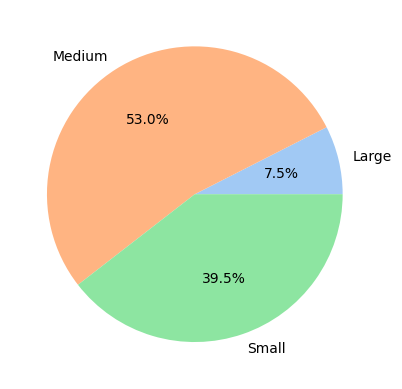

In [27]:
# Import thư viện 
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt

gb = df.groupby(['DEALSIZE']) ['QUANTITYORDERED'].agg(['sum'])
labels = gb.index
data =  list(gb['sum'])
color = sb.color_palette('pastel')
plt.pie(data, labels = labels , colors=color, autopct= '%1.1f%%', shadow= False)

plt.show()


# Câu 18
Giá trị của SALES sau khi dung chuẩn hóa Z-score Scaler là 0.25 , giá trị trước chuẩn hóa là bao nhiêu

In [28]:
z_score = 0.25  # Giá trị sau khi sử dụng Z-score scaler
mean = df['SALES'].mean() # Giá trị trung bình (Mean) của SALES trước khi chuẩn hóa
std_dev = std_dev = df['SALES'].std() # Độ lệch chuẩn (Standard Deviation) của SALES trước khi chuẩn hóa

# Tính giá trị ban đầu của SALES

sales_original = z_score * std_dev + mean

sales_original

0.2597096575642495

In [29]:
x = 4014.27378491

# Giá trị trung bình của biến định lượng
mean = df['SALES'].mean()

# Độ lệch chuẩn 
std_dev = df['SALES'].std()

# Tính Z-score
z = (x - mean) / std_dev

z



29640.46667098383

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   COUNTRY          2823 non-null   object 
 7   DEALSIZE         2823 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 176.6+ KB


# Câu 19
Tương quan mẫu giữa QUANTIYORDERED và SALES

In [31]:
df[['SALES', 'QUANTITYORDERED']].corr()

,SALES,QUANTITYORDERED
SALES,1.000000,0.551426
QUANTITYORDERED,0.551426,1.000000


Tương quan <br>
Hoàn hảo: 1 hoặc -1 <br>
Thuận: 0.5-1 hoặc -0.5- -1 <br>
Yếu -0.5 đến 0.5 <br>
ko tương quan là 0

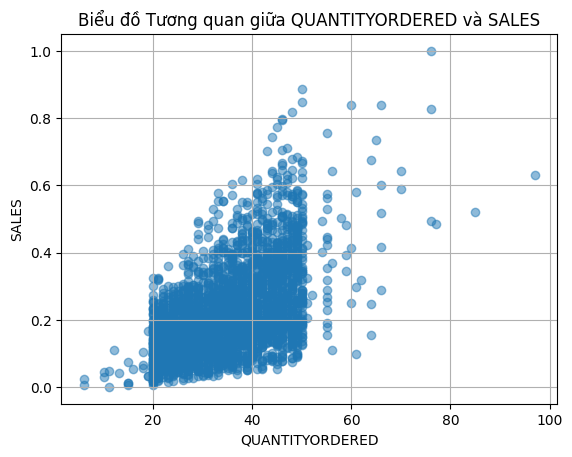

In [32]:
import matplotlib.pyplot as plt
plt.scatter(df['QUANTITYORDERED'],df['SALES'], alpha=0.5)
plt.title('Biểu đồ Tương quan giữa QUANTITYORDERED và SALES')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.grid(True)
plt.show()

# Câu 20 
Dựa vào biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng thì yếu tố kích thước đặt hàng có vai trò trong việc dự báo giá trị dặt hàng hay không 


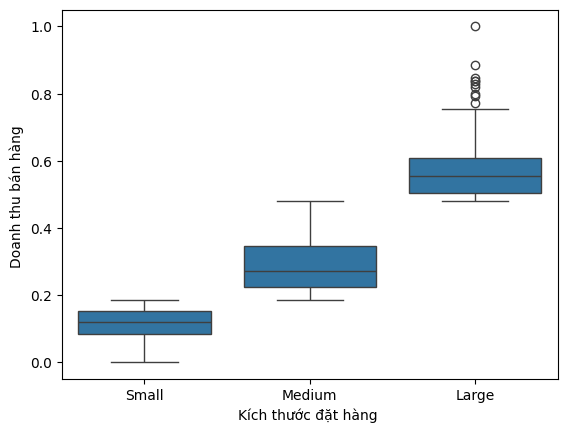

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='DEALSIZE',y='SALES',data=df)
plt.xlabel('Kích thước đặt hàng ')
plt.ylabel('Doanh thu bán hàng ')
plt.show() 
# theo như chúng ta thấy thì có thể dự báo đc vì Small nó chỉ nằm trong khoảng từ 1500 đén 3000 và tương tự nó có thể cho ta thấy sự tương quan 

# Câu 22
Hold on có màu gì

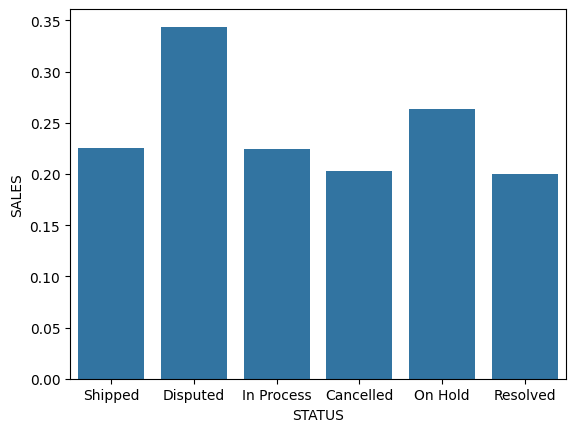

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot (y='SALES', x ='STATUS', data =df, errorbar=None)
plt.show()

# Câu 24
 Sử dụng Z-core cho SALES , sau đó tiếp tục áp dụng MAX Absolute Scaler thì giá trị có index = 100 được scale thành bao nhiêu

In [35]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Sử dụng Z-core Scaler để chuẩn hóa Z-score cho cột SALES
z_score_scaler = StandardScaler()
df['SALES_Z'] = z_score_scaler.fit_transform(df[['SALES']])

# Sử dụng MAX Absolute Scaler để áp dụng Max Absolute Scaler cho cột SALES đã được chuẩn hóa
max_abs_scaler = MaxAbsScaler()
df['SALES_MaxAbs'] = max_abs_scaler.fit_transform(df[['SALES_Z']])

# Lấy giá trị của phần tử có index 100 sau khi áp dụng MAX Absolute Scaler
scaled_value = df.at[100, 'SALES_MaxAbs']
print(scaled_value)

-0.05354391121357396


# Câu 25
Tổng doanh thu đặt hàng ở quốc gia nào nhiều ở vị trí số 5

In [36]:
country_sales = df.groupby('COUNTRY')['SALES'].sum().reset_index()

# Sắp xếp dữ liệu theo tổng doanh số giảm dần
sorted_country_sales = country_sales.sort_values(by='SALES', ascending=False)

# Lấy quốc gia ở vị trí thứ 5
fifth_country = sorted_country_sales.iloc[4]['COUNTRY']
total_sales_fifth_country = sorted_country_sales.iloc[4]['SALES']

print(f"Quốc gia ở vị trí thứ 5 về tổng doanh số là: {fifth_country}")
print(f"Tổng doanh số của quốc gia {fifth_country} là: {total_sales_fifth_country}")

Quốc gia ở vị trí thứ 5 về tổng doanh số là: UK
Tổng doanh số của quốc gia UK là: 30.1054095129137


# câu 26
Có mối liên hệ nào giữa trạng thái giao hàng và giá trị đặt hàng hay không 


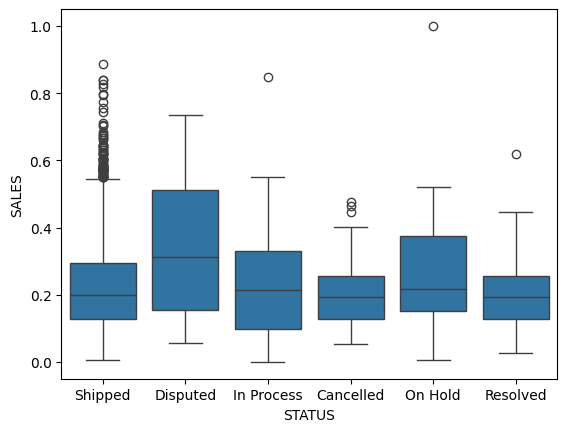

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='STATUS', y='SALES', data=df)
plt.show()
# theo biểu đồ ta có thể thấy là shipped và những dữ liệu khác có những điểm chung nhau từng khúc tức nó có quan hệ vs nhau 

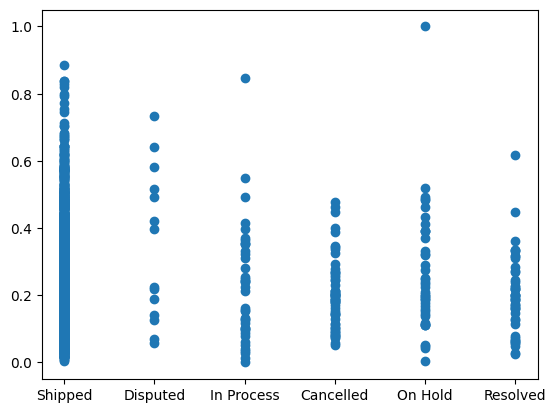

In [38]:
plt.scatter(x='STATUS', y='SALES', data=df)
plt.show()

In [39]:
from scipy.stats import chi2_contingency


crosdata = pd.crosstab(df['STATUS'], [df['QUANTITYORDERED']], rownames=['STATUS'], colnames=['QUANTITYORDERED'])

stat, p, dof, expected = chi2_contingency(crosdata)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

# => có phụ thuộc

p value is 8.302151811554312e-187
Dependent (reject H0)


# câu 27
 Hãy cho biết thứ tự ổn định tăng dần của giá trị bán hàng trên từng nhóm kích thước đặt hàng 


In [40]:
# Nhóm dữ liệu theo kích thước đặt hàng và tính trung bình giá trị bán hàng trong mỗi nhóm
average_sales_by_dealsize = df.groupby('DEALSIZE')['SALES'].mean()

# Sắp xếp dữ liệu theo giá trị trung bình tăng dần
sorted_sales_by_dealsize = average_sales_by_dealsize.sort_values()

# Hiển thị thứ tự ổn định tăng dần của giá trị bán hàng trên từng nhóm kích thước đặt hàng
print(sorted_sales_by_dealsize)

DEALSIZE
Small     0.116138
Medium    0.287949
Large     0.574356
Name: SALES, dtype: float64


In [41]:
df.groupby('DEALSIZE')['SALES'].describe()

,count,mean,std,min,25%,50%,75%,max
DEALSIZE,,,,,,,,
Large,157.0,0.574356,0.095197,0.480431,0.503426,0.553387,0.608247,1.000000
Medium,1384.0,0.287949,0.076988,0.185305,0.223089,0.270620,0.345151,0.478968
Small,1282.0,0.116138,0.042438,0.000000,0.085011,0.119983,0.151644,0.185126


# Câu 28
Hãy cho biết dựa vào biểu đồ boxplot về doanh số trên từng kích thước đặt hàng , nếu có dữ liệu thiếu trên nhóm  DEALSIZE = Medium thì dữ liệu đó nên được thay thế bằng


In [42]:
(df[df['DEALSIZE'] == 'Small']['SALES'].mean() + df[df['DEALSIZE'] == 'Medium']['SALES'].mean()) / 2.0

# chọn Câu trung bình của Small và Medium vì có giá trị trung bình gần với Medium nhất

0.20204359416609538

# Câu 29 
Câu 29 : Hãy cho biết biểu đồ chỉ có 2 cột thuộc nhóm status nào

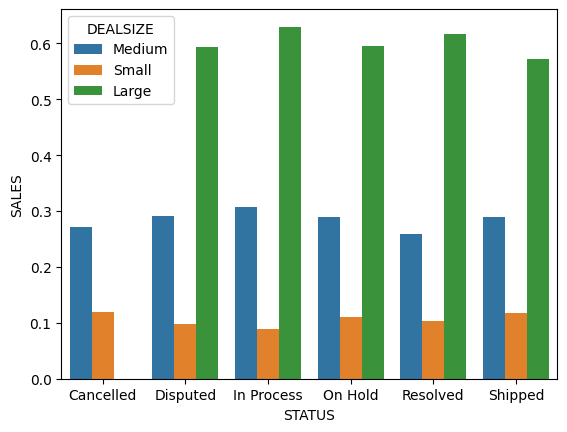

In [43]:
groupby_data = df.groupby(['STATUS', 'DEALSIZE'])['SALES'].mean().reset_index()

# Vẽ biểu đồ cột
sns.barplot(x='STATUS', y='SALES', hue='DEALSIZE', data=groupby_data)

plt.show()

# Câu 30 There are the different HTTP response status codes . Which code follows the idempotent rule ?
POST is NOT idempotent. GET, PUT, DELETE, HEAD, OPTIONS and TRACE are idempotent.

# Câu 31


# Câu 32 : 
Hãy cho biết mức độ lệch của SALES sau khi được transform qa hàm log

In [44]:
from scipy.stats import skew

result = np.log(df['SALES'])
print(result.skew())

result2 = df['SALES']
print(result2.skew())

nan
1.1610760008812884


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


lệch nhiều với lệch nghịch

# Câu 33
How does VPN work usefully for web scraping ? <br>
a. You send a request to the VPN server. It reads the data from the website VPN sends back the response to your IP address <br>
b. VPN has a pool of IP addresses. <br>
c. VPN is lite computer for web scraping <br>
d. Even if the VPN IP address gets blocked, they can use another IP address from the pool <br>
e. VPN hides your IP address from the website server <br><br>


Chọn B, D, E

# Câu 34 
There are multiple steps involved in web scraping, what order of steps is correct:  <br>
S1: S1 Reading data (source code of the web page URL) from the website \
S2: S2Parsing this data based on the HTML tags \
S3: Storing or displaying desired scraped information \
S4: Using scraped data in data analytics. \
a. S4,S2,S3,S1 \
b. S3,S2,S1,S4 \
C. S4,S3,S2,S1 \
d. S2,S1,S3,S4 \
e. S1,S2,S3,S4  \
Chọn e

# Câu 35
Hãy cho biết biến DEALSIZE thuộc thang đo nào ? <br>
- Định danh - Phân loại - Thứ bậc - khoảng - tỉ  lệ  <br>
Chọn đáp án : Phân Loại

# Câu 36
Hãy cho biết mã Đơn Hàng có số dòng đặt hàng nhiều nhất

In [45]:
result = df.groupby('ORDERNUMBER')['QUANTITYORDERED'].sum()
result.sort_values(ascending=False).head(12)

# Trừ 10225

ORDERNUMBER
10222    717
10106    675
10165    670
10386    650
10168    642
10398    629
10316    623
10332    621
10204    619
10310    619
10126    617
10207    615
Name: QUANTITYORDERED, dtype: int64

# Câu 37 
 Biểu đồ nào phù hợp với biến định tính ? <br>
Biểu đồ : <br>
e. Bar chart (biểu đồ cột): Biểu đồ cột (bar chart) là biểu đồ phù hợp nhất để biểu diễn biến định tính. Nó thể hiện số lượng hoặc tần suất của các giá trị định tính và thường được sử dụng để so sánh giữa các danh mục. <br><br>

b. Pie chart (biểu đồ hình bánh): Biểu đồ hình bánh (pie chart) cũng có thể được sử dụng để biểu diễn sự phân chia phần trăm của các danh mục trong biến định tính. Tuy nhiên, nó thường được ưa chuộng khi bạn muốn thể hiện sự phân chia phần trăm và tổng quan của các danh mục. \

Biếu đồ Scatter dùng để biểu diễn 2 biến định tính chứ ko dùng riêng lẻ.

# Câu 38
Hãy cho biết kích thước của dữ liệu ?

In [46]:

df.shape

(2823, 10)

# Câu 39 
Hãy cho biết dựa vào biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng , hãy cho biết giá trị đặt hàng bất thường xuất hiện nhóm nào

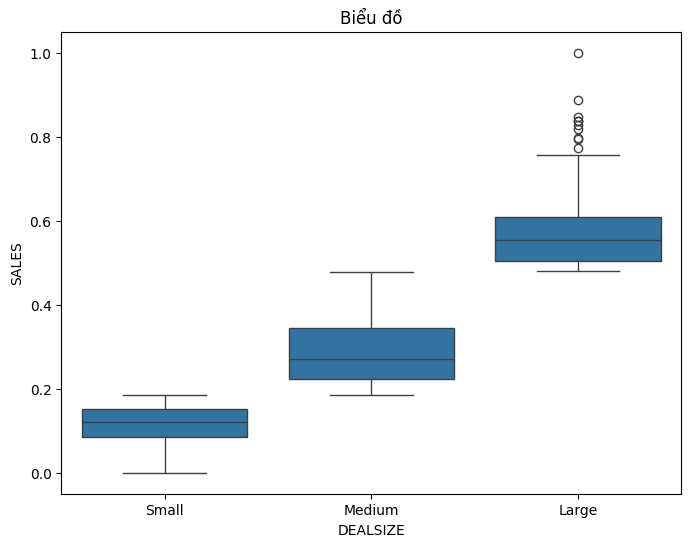

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.xlabel('DEALSIZE')
plt.ylabel('SALES')
plt.title('Biểu đồ')
plt.show()

Cột large có các giá trị ngoại lai

# Câu 40
Nếu sử dụng One Hot Encoding để số hóa dữu liệu DEALSIZE thì kết quả của cuối cùng là bao nhiêu

In [48]:
from sklearn.preprocessing import LabelBinarizer

y = LabelBinarizer().fit_transform(df.DEALSIZE) # giúp tạo ra matrix vector
y[-1]

# D

array([0, 1, 0])